In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as st

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 11 19:15:23 2020

@author: juan
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit

import os

import time

import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning) 

start = time.time() #Saves the begining time of the process

os.makedirs('GraficasProyDNN',exist_ok=True)


In [3]:
#==============================================================================
#LEER DATOS
#==============================================================================
fecha = '2021-08-31'

casos = pd.read_csv('Confirmados por municipio, fecha de emisión de resultado del 2020-02-13 al '+fecha+'.csv')

sintomas = pd.read_csv('Confirmados por municipio, fecha de emisión de resultado del 2020-02-13 al '+fecha+'.csv')

poblaciones = pd.read_excel('PoblacionMunicipal.xlsx')

#==============================================================================
#ELIMINAR SIN DATO
#==============================================================================

casos = casos[casos.codigo_municipio != 99]

sintomas = sintomas[sintomas.codigo_municipio != 99]

codigoCasos = casos['codigo_municipio']

codigoSintomas = sintomas['codigo_municipio']

codigoPob = poblaciones['codigo_municipio']

faltanCasosMuni = np.array(list(set(casos.municipio).symmetric_difference(poblaciones.municipio)))
faltanCasosDepto = []
for i in range(len(faltanCasosMuni)):
    faltanCasosDepto.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'departamento'].iloc[0])
faltanCasosCodigoMuni = []
for i in range(len(faltanCasosMuni)):
    faltanCasosCodigoMuni.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'codigo_municipio'].iloc[0])
faltanCasosPob = []
for i in range(len(faltanCasosMuni)):
    faltanCasosPob.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'poblacion'].iloc[0])
faltanCasosCodigoDepto = []
for i in range(len(faltanCasosMuni)):
    if faltanCasosDepto[i] == 'ALTA VERAPAZ':
        faltanCasosCodigoDepto.append(16)
    elif faltanCasosDepto[i] == 'BAJA VERAPAZ':
        faltanCasosCodigoDepto.append(15)
    elif faltanCasosDepto[i] == 'CHIMALTENANGO':
        faltanCasosCodigoDepto.append(4)
    elif faltanCasosDepto[i] == 'CHIQUIMULA':
        faltanCasosCodigoDepto.append(20)
    elif faltanCasosDepto[i] == 'EL PROGRESO':
        faltanCasosCodigoDepto.append(2)
    elif faltanCasosDepto[i] == 'ESCUINTLA':
        faltanCasosCodigoDepto.append(5)
    elif faltanCasosDepto[i] == 'GUATEMALA':
        faltanCasosCodigoDepto.append(1)
    elif faltanCasosDepto[i] == 'HUEHUETENANGO':
        faltanCasosCodigoDepto.append(13)
    elif faltanCasosDepto[i] == 'IZABAL':
        faltanCasosCodigoDepto.append(18)
    elif faltanCasosDepto[i] == 'JALAPA':
        faltanCasosCodigoDepto.append(21)
    elif faltanCasosDepto[i] == 'JUTIAPA':
        faltanCasosCodigoDepto.append(22)
    elif faltanCasosDepto[i] == 'PETEN':
        faltanCasosCodigoDepto.append(17)
    elif faltanCasosDepto[i] == 'QUETZALTENANGO':
        faltanCasosCodigoDepto.append(9)
    elif faltanCasosDepto[i] == 'QUICHE':
        faltanCasosCodigoDepto.append(14)
    elif faltanCasosDepto[i] == 'RETALHULEU':
        faltanCasosCodigoDepto.append(11)
    elif faltanCasosDepto[i] == 'SACATEPEQUEZ':
        faltanCasosCodigoDepto.append(3)
    elif faltanCasosDepto[i] == 'SAN MARCOS':
        faltanCasosCodigoDepto.append(12)
    elif faltanCasosDepto[i] == 'SANTA ROSA':
        faltanCasosCodigoDepto.append(6)
    elif faltanCasosDepto[i] == 'SOLOLA':
        faltanCasosCodigoDepto.append(7)
    elif faltanCasosDepto[i] == 'SUCHITEPEQUEZ':
        faltanCasosCodigoDepto.append(10)
    elif faltanCasosDepto[i] == 'TOTONICAPAN':
        faltanCasosCodigoDepto.append(8)
    elif faltanCasosDepto[i] == 'ZACAPA':
        faltanCasosCodigoDepto.append(19)

faltanSintomasMuni = np.array(list(set(sintomas.municipio).symmetric_difference(poblaciones.municipio)))
faltanSintomasDepto = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasDepto.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'departamento'].iloc[0])
faltanSintomasCodigoMuni = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasCodigoMuni.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'codigo_municipio'].iloc[0])
faltanSintomasPob = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasPob.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'poblacion'].iloc[0])
faltanSintomasCodigoDepto = []
for i in range(len(faltanSintomasMuni)):
    if faltanSintomasDepto[i] == 'ALTA VERAPAZ':
        faltanSintomasCodigoDepto.append(16)
    elif faltanSintomasDepto[i] == 'BAJA VERAPAZ':
        faltanSintomasCodigoDepto.append(15)
    elif faltanSintomasDepto[i] == 'CHIMALTENANGO':
        faltanSintomasCodigoDepto.append(4)
    elif faltanSintomasDepto[i] == 'CHIQUIMULA':
        faltanSintomasCodigoDepto.append(20)
    elif faltanSintomasDepto[i] == 'EL PROGRESO':
        faltanSintomasCodigoDepto.append(2)
    elif faltanSintomasDepto[i] == 'ESCUINTLA':
        faltanSintomasCodigoDepto.append(5)
    elif faltanSintomasDepto[i] == 'GUATEMALA':
        faltanSintomasCodigoDepto.append(1)
    elif faltanSintomasDepto[i] == 'HUEHUETENANGO':
        faltanSintomasCodigoDepto.append(13)
    elif faltanSintomasDepto[i] == 'IZABAL':
        faltanSintomasCodigoDepto.append(18)
    elif faltanSintomasDepto[i] == 'JALAPA':
        faltanSintomasCodigoDepto.append(21)
    elif faltanSintomasDepto[i] == 'JUTIAPA':
        faltanSintomasCodigoDepto.append(22)
    elif faltanSintomasDepto[i] == 'PETEN':
        faltanSintomasCodigoDepto.append(17)
    elif faltanSintomasDepto[i] == 'QUETZALTENANGO':
        faltanSintomasCodigoDepto.append(9)
    elif faltanSintomasDepto[i] == 'QUICHE':
        faltanSintomasCodigoDepto.append(14)
    elif faltanSintomasDepto[i] == 'RETALHULEU':
        faltanSintomasCodigoDepto.append(11)
    elif faltanSintomasDepto[i] == 'SACATEPEQUEZ':
        faltanSintomasCodigoDepto.append(3)
    elif faltanSintomasDepto[i] == 'SAN MARCOS':
        faltanSintomasCodigoDepto.append(12)
    elif faltanSintomasDepto[i] == 'SANTA ROSA':
        faltanSintomasCodigoDepto.append(6)
    elif faltanSintomasDepto[i] == 'SOLOLA':
        faltanSintomasCodigoDepto.append(7)
    elif faltanSintomasDepto[i] == 'SUCHITEPEQUEZ':
        faltanSintomasCodigoDepto.append(10)
    elif faltanSintomasDepto[i] == 'TOTONICAPAN':
        faltanSintomasCodigoDepto.append(8)
    elif faltanSintomasDepto[i] == 'ZACAPA':
        faltanSintomasCodigoDepto.append(19)
#==============================================================================
#AGREGAR DATOS QUE FALTAN
#==============================================================================
#extraer una fila del df de casos
primerafila = casos.iloc[1]
primerafila = primerafila.iloc[5:].values
datosFaltan = np.zeros(len(primerafila))

datosFaltanCasosCols = casos.columns
datosFaltanSintomasCols = sintomas.columns

datosFaltanCasos = np.zeros((len(faltanCasosDepto),len(datosFaltanCasosCols))).astype(object)
for i in range(len(faltanCasosDepto)):
    for j in range(len(datosFaltanCasosCols)):
        if j ==0:
            datosFaltanCasos[i][j] = faltanCasosDepto[i]
        elif j==1:
            datosFaltanCasos[i][j] = faltanCasosCodigoDepto[i]
        elif j==2:
            datosFaltanCasos[i][j] = faltanCasosMuni[i]
        elif j==3:
            datosFaltanCasos[i][j] = faltanCasosCodigoMuni[i]
        elif j==4:
            datosFaltanCasos[i][j] = faltanCasosPob[i]
            
datosFaltanSintomas = np.zeros((len(faltanSintomasDepto),len(datosFaltanSintomasCols))).astype(object)
for i in range(len(faltanSintomasDepto)):
    for j in range(len(datosFaltanSintomasCols)):
        if j ==0:
            datosFaltanSintomas[i][j] = faltanSintomasDepto[i]
        elif j==1:
            datosFaltanSintomas[i][j] = faltanSintomasCodigoDepto[i]
        elif j==2:
            datosFaltanSintomas[i][j] = faltanSintomasMuni[i]
        elif j==3:
            datosFaltanSintomas[i][j] = faltanSintomasCodigoMuni[i]
        elif j==4:
            datosFaltanSintomas[i][j] = faltanSintomasPob[i]
            
FaltanCasos = pd.DataFrame(datosFaltanCasos,columns=casos.columns)
FaltanSintomas = pd.DataFrame(datosFaltanSintomas,columns=sintomas.columns)

print('En casos positivos no hay datos de ' + str(FaltanCasos['municipio'].values))
print('En sintomas no hay datos de ' + str(FaltanSintomas['municipio'].values))

casos = casos.append(FaltanCasos)
sintomas = sintomas.append(FaltanSintomas)

#==============================================================================
#EXTRAER DATOS POR DEPARTAMENTO
#==============================================================================

departamentos = casos['departamento'].unique()
municipios = casos['municipio'].unique()

NOMBREDEPTO = []
Poblacion =[]
POSITIVOSDEPTO = []
SINTOMASDEPTO = []

for depto in departamentos:
    NOMBREDEPTO.append(depto)



En casos positivos no hay datos de []
En sintomas no hay datos de []


/tmp/ipykernel_3657/2979808534.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  casos = casos.append(FaltanCasos)
/tmp/ipykernel_3657/2979808534.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sintomas = sintomas.append(FaltanSintomas)


/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


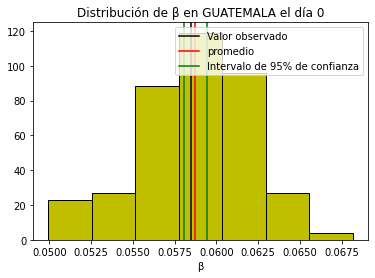

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


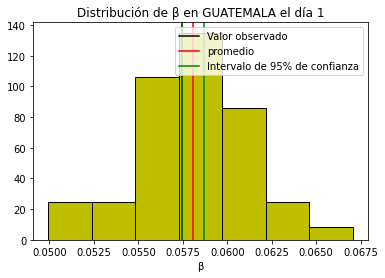

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


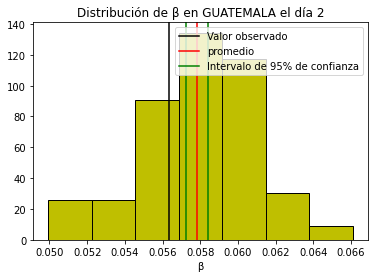

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


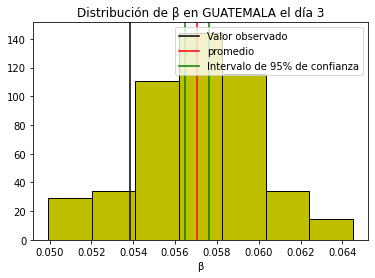

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


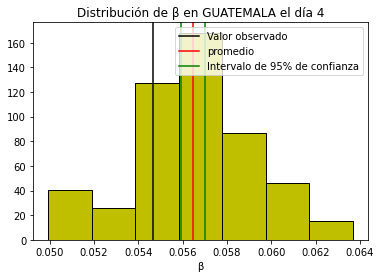

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


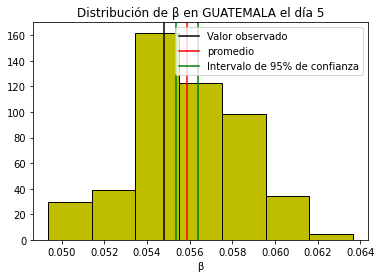

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


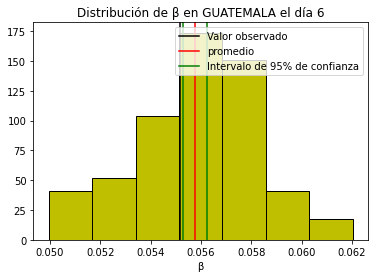

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


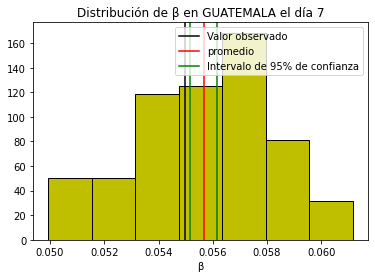

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


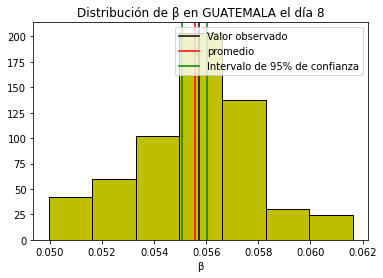

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


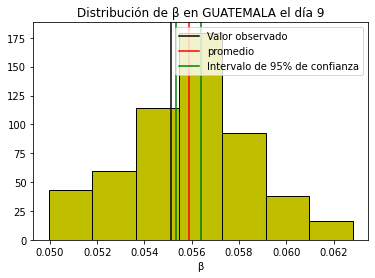

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


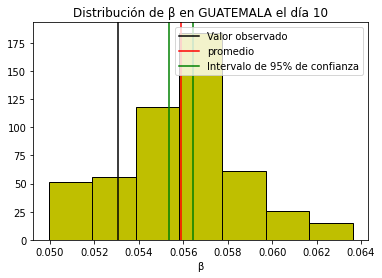

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


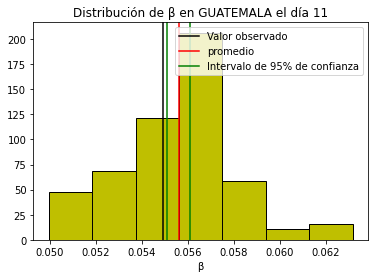

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


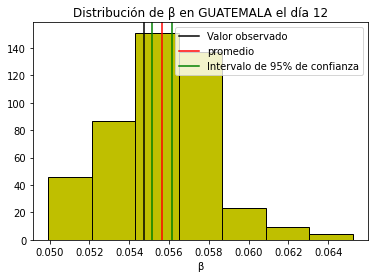

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


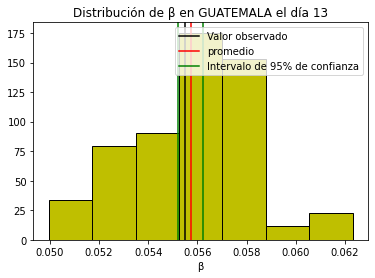

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


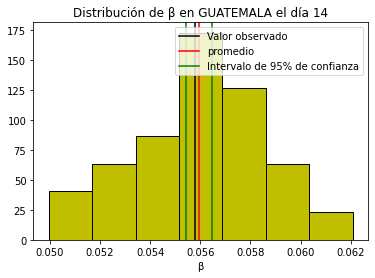

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


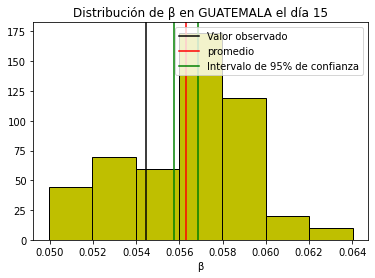

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


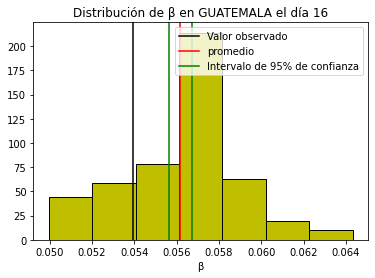

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


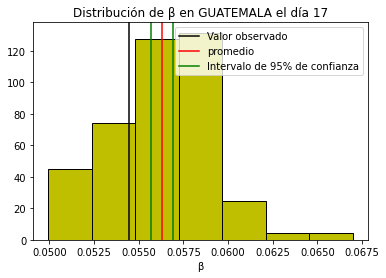

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


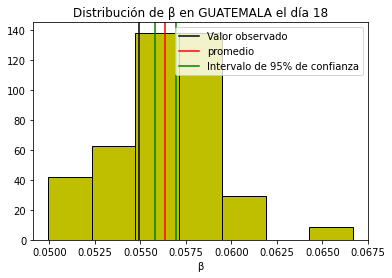

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


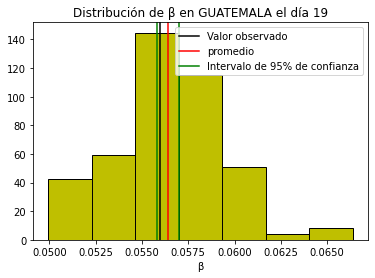

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


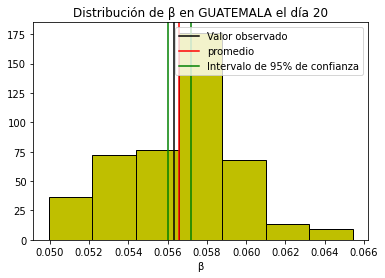

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


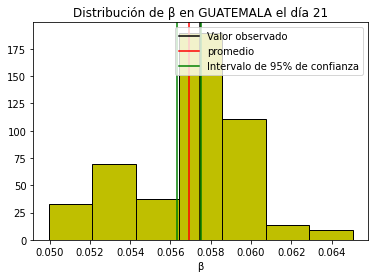

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


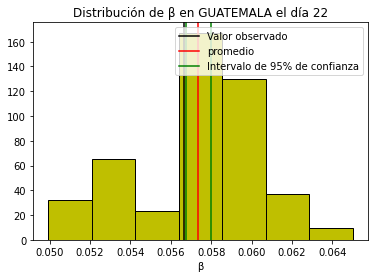

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


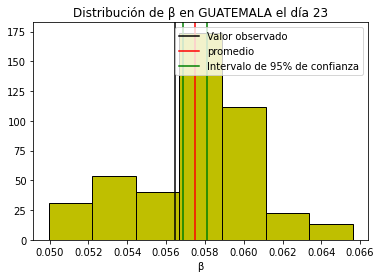

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


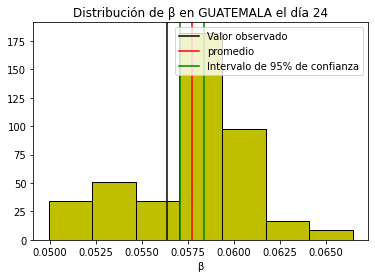

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


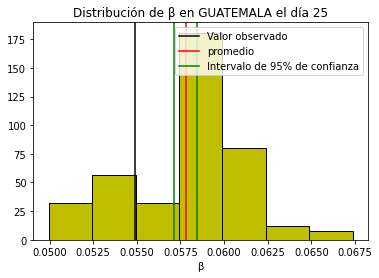

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


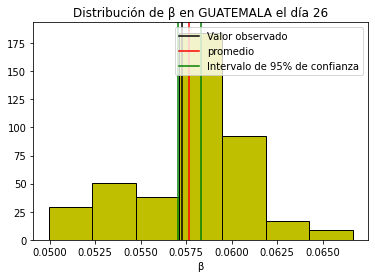

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


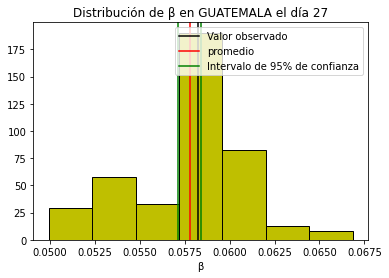

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


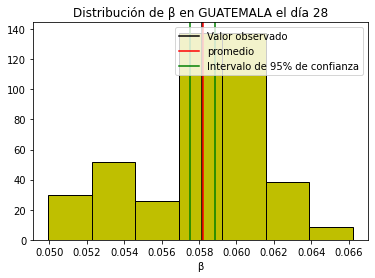

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


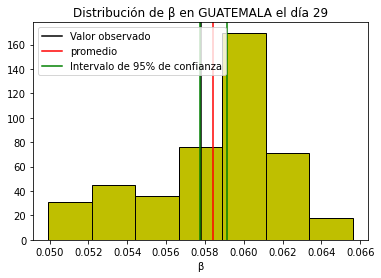

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


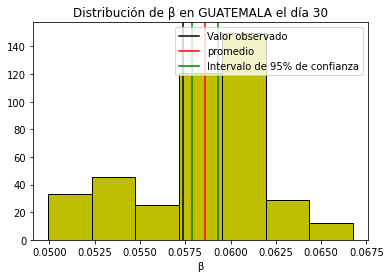

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


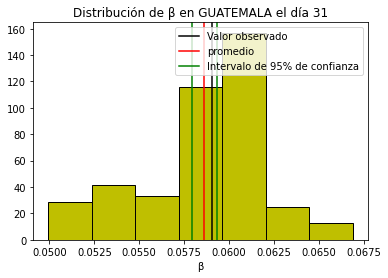

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


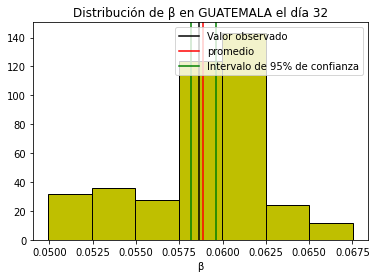

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


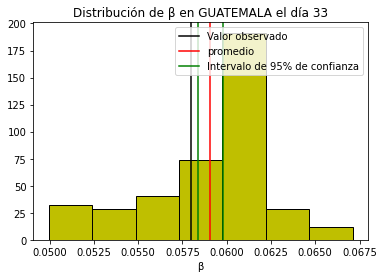

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


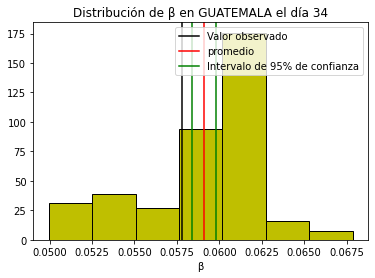

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


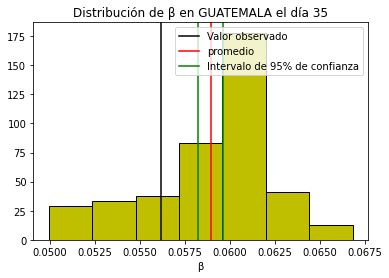

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


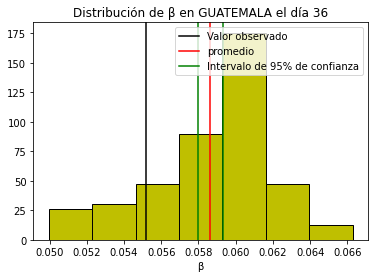

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


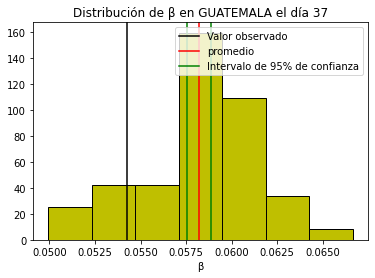

/tmp/ipykernel_3657/857364977.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
/tmp/ipykernel_3657/857364977.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]


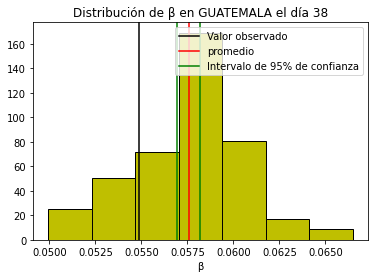

In [4]:
#OBSERVANDO LAS DISTRIBUCIONES
DIAS =39
promedio = []
DISTRIBUCION = []

for n in range(1): #n-esimo departamento
    for dia in range(DIAS): #calcula el promedio diario de las 100 redes.
        distribucion = []
        for m in range(100): #para las m redes neuronales utilizadas.
            #leyendo el archivo generado por otro script.
            coeficientesBeta = pd.read_csv(NOMBREDEPTO[n] + 'BetaPrediccion'+str(m)+'.csv') 
            datos = coeficientesBeta["Beta Prediccion"][dia] #beta para cierto dia, datos es UN numero
            distribucion.append(datos) #listado de los m betas predichos cierto dia. 
            #########################################################
            #Matriz que contiene en cada fila las predicciones de todas las redes para cierto dia
        DISTRIBUCION.append(distribucion)
        
        _ = plt.hist(distribucion, bins=7, density=True, histtype='bar', ec='black', color='y') #histograma de betas para cada dia
        # x coordinates for the lines
        xcoords1 = [coeficientesBeta["Beta Real"][dia]]
        # colors for the lines
        colors1 = ['k']

        xcoords2 = [np.mean(distribucion)] #promedio de las predicciones a cierto dia
        # colors for the lines
        colors2 = ['r']
        promedio.append(xcoords2)

        LimiteInferior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[0]]
        LimiteSuperior = [st.norm.interval(alpha=0.95, loc=np.mean(distribucion), scale=st.sem(distribucion))[1]]
        colors3 = ['g']

        for xc,c in zip(xcoords1,colors1):
            plt.axvline(x=xc, label='Valor observado', c=c)
 
        for xc,c in zip(xcoords2,colors2):
            plt.axvline(x=xc, label='promedio', c=c)
        
        for xc,c in zip(LimiteInferior,colors3):
            plt.axvline(x=xc, label='Intervalo de 95% de confianza', c=c)
 
        for xc,c in zip(LimiteSuperior,colors3):
            plt.axvline(x=xc, c=c)

        plt.legend()
        plt.title("Distribución de \u03B2 en " + NOMBREDEPTO[n]+ " el día " + str(dia))
        plt.xlabel("\u03B2")
        #plt.savefig('HISTOGRAMAS1/'+NOMBREDEPTO[n]+'HIST' + str(dia) + '.png', bbox_inches = 'tight')

        plt.show()
        #ME FALTA INDICAR LAS UNIDADES DE BETA


In [5]:
C = DISTRIBUCION[0] 
for i in range(1, DIAS):
    C = C + DISTRIBUCION[i] #necesitamos transformar la matriz DISTRIBUCION a un array 1D para 
    #utilizarlo en sns.lineplot y poder graficar la banda de incerteza (95% de confianza)
x = []
for i in range(DIAS):
    for j in range(100): #cantidad de redes neuronales
        x.append(i) #x sera la coordenada independiente o el tiempo para usar en  sns.lineplot 


/home/carlos/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


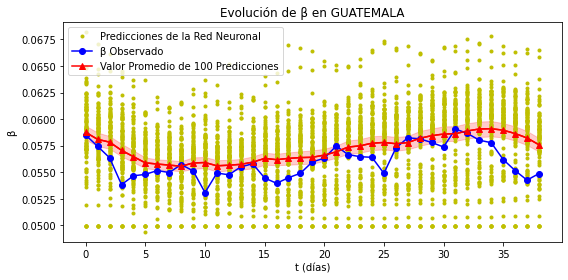

In [9]:
for n in range(1): #n-esimo departamento
    plt.figure(figsize=(8,4))
    ax = sns.lineplot(x, C, color='red', ci=95) #graficando la banda de incerteza
    for m in range(100):
        coeficientesBeta = pd.read_csv(NOMBREDEPTO[n] + 'BetaPrediccion'+str(m)+'.csv')
        plt.plot(coeficientesBeta["Beta Prediccion"],'y.') #Todas las predicciones de beta se muestran como puntos
    plt.plot(coeficientesBeta["Beta Prediccion"],'y.', label='Predicciones de la Red Neuronal')
    coeficientesBeta = pd.read_csv(NOMBREDEPTO[n] + 'BetaPrediccion'+str(0)+'.csv')
    plt.plot(coeficientesBeta["Beta Real"], 'bo-', label="\u03B2 Observado") #El valor observado en circulos
    plt.plot(promedio, 'r^-', label="Valor Promedio de 100 Predicciones") #la prediccion promedio en triangulos
    plt.legend(loc="upper left")
    plt.title("Evolución de \u03B2 en " + NOMBREDEPTO[n])
    plt.xlabel("t (días)")
    plt.ylabel("\u03B2")

    plt.savefig('EVOLUCIONBETA/'+NOMBREDEPTO[n]+'EVOLUCION'+ '.pdf', bbox_inches = 'tight')

    plt.tight_layout()
    #aca la región rojo suave alrededor de los promedios es 
    #la banda de incerteza correspondiendo al 95% de confianza.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


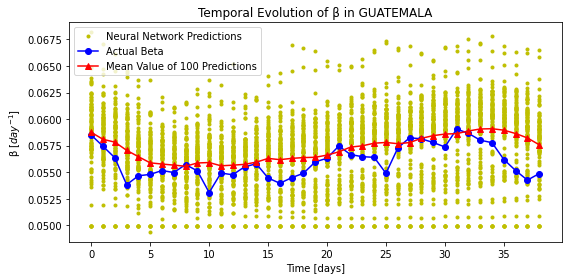

In [7]:
for n in range(1): #n-esimo departamento
    plt.figure(figsize=(8,4))
    #ax = sns.lineplot(x, C, color='red', ci=95) #graficando la banda de incerteza
    for m in range(100):
        coeficientesBeta = pd.read_csv(NOMBREDEPTO[n] + 'BetaPrediccion'+str(m)+'.csv')
        plt.plot(coeficientesBeta["Beta Prediccion"],'y.') #Todas las predicciones de beta se muestran como puntos
    plt.plot(coeficientesBeta["Beta Prediccion"],'y.', label='Neural Network Predictions')
    coeficientesBeta = pd.read_csv(NOMBREDEPTO[n] + 'BetaPrediccion'+str(0)+'.csv')
    plt.plot(coeficientesBeta["Beta Real"], 'bo-', label="Actual Beta") #El valor observado en circulos
    plt.plot(promedio, 'r^-', label="Mean Value of 100 Predictions") #la prediccion promedio en triangulos
    plt.legend(loc="upper left")
    plt.title("Temporal Evolution of \u03B2 in " + NOMBREDEPTO[n])
    plt.xlabel("Time [days]")
    plt.ylabel("\u03B2 $[day^{-1}]$")

    plt.savefig('EVOLUCIONBETA/'+NOMBREDEPTO[n]+'EVOLUCION'+ '.pdf', bbox_inches = 'tight')
    plt.savefig('EVOLUCIONBETA/'+NOMBREDEPTO[n]+'EVOLUCION'+ '.eps', bbox_inches = 'tight')

    plt.tight_layout()
    #aca la región rojo suave alrededor de los promedios es 
    #la banda de incerteza correspondiendo al 95% de confianza.
